# snATAC-seq - Allantoic-haemato-endothelial landscape

Blanca Pijuan-Sala

18 April 2019

In [267]:
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as pl
import scanpy.api as sc
import pandas as pd
import matplotlib.pyplot as plt
import episcanpy.api as epi
import anndata as ad
import numpy as np

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=100, color_map='viridis')  # low dpi (dots per inch) yields small inline figures
sc.logging.print_versions()
#Set working directory
wd = '/path/to/directory/sample_pooled_preprocess_revision1/'
direc = wd
sc.settings.figdir = './plots/'
results_file="./write/20190416_snATACseq_embryo_revision01_doublets_cisTopic_50_100_filtered_ery_endo_allantois.h5ad"

scanpy==1.4.4.post1 anndata==0.6.22.post1 umap==0.3.7 numpy==1.15.0 scipy==1.3.0 pandas==0.24.0 scikit-learn==0.20.2 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


## Read files

In [268]:
##====== Read counts ======##

filename_data = direc + '11_matrix_afterClusterQC/embryo_revision1_allPeaks_afterClusterPeak.mat.bin.mtx'
filename_gene_names = direc + '11_matrix_afterClusterQC/embryo_revision1_allPeaks_passedQC_peakNames.txt'
filename_barcodes = direc + '11_matrix_afterClusterQC/embryo_revision1_allPeaks_passedQC_barcodeNames.xgi'
#filename_clustersAll = wd + 'data/cellTypes_20180215.txt'
#adata_all_cells = epi.tl.read_ATAC(filename_data, filename_barcodes, filename_gene_names,path_file='')

print('reading counts')
adata_all_cells = sc.read(filename_data, cache=True).transpose()
adata_all_cells.X = adata_all_cells.X.astype(np.int64)
print('reading genes')
adata_all_cells.var_names = np.genfromtxt(filename_gene_names, dtype='str')
print('reading cells')
adata_all_cells.obs_names = np.genfromtxt(filename_barcodes, dtype='str')



reading counts
Only considering the two last: ['.bin', '.mtx'].
Only considering the two last: ['.bin', '.mtx'].
... reading from cache file cache/home-USSR-codex-pipeline-Data-Rebecca-Blanca-sample_pooled_preprocess_revision1-11_matrix_afterClusterQC-embryo_revision1_allPeaks_afterClusterPeak.mat.bin.h5ad
reading genes
reading cells


In [269]:
adata_all_cells.shape

(23838, 305187)

In [270]:
cells = np.genfromtxt(direc + "12_barcodeStats_celltypePeaks/embryo_revision1_readsPeaks24.xgi", dtype='str')
adata = adata_all_cells[np.array([str(i) in cells for i in adata_all_cells.obs_names]),:]


In [271]:
UMAPfilename = wd + '14_visualisation/data/snATACseq_embryo_revision1_reads_in_peaks_above_24_UMAP.csv'
UMAP = pd.read_table(UMAPfilename,delimiter=',')
UMAP.shape

UMAP_x = [-float(i) for i in UMAP.loc[:,"0"]]

UMAP_y = [float(i) for i in UMAP.loc[:,"1"]]

coords_matrix = np.array([UMAP_x, UMAP_y])
#Add coordinates in to adata file
adata.obsm['X_umap'] = np.array(coords_matrix.T)

## colour Palettes

In [4]:
#adata = sc.read(results_file)


In [272]:
##====== Create colour palette for gene expression profiles ======##

from matplotlib.colors import LinearSegmentedColormap
rmap = LinearSegmentedColormap.from_list(name='gene_cmap',
                                         colors=['lightgrey', 'thistle', 'red', 'darkred'])

cmap = LinearSegmentedColormap.from_list(name='gene_cmap',
                                         colors=["#BFBFBF","#6495ED","#000000"])

In [274]:
clust_endo_colours = {
  "clust0":"#f9a602",#Endothelium
    "clust1":"#8d021f",#Ery

  "clust2":"#933a16",
"clust3":"#bf0a30",#Ery
  "clust4":"#c06c84",#transition AL
  "clust5":"#260805",#Ery
  "clust6":"#ef820d",#HE
  "clust7":"#81007f",#AL
  "clust8":"#5e1914",#Ery

  "clust9":"#7852a9",#AL
"clust10":"#b200ed",#AL

  "clust11":"#ea3c53",#Ery
  "clust12":"#a45a52",#Ery
  "clust13":"#6f2da8",#AL
  "clust14": "#fa8072",#Ery
  "clust15":"#ff0800",#transition blood
  "clust16":"#ed2939"
  
}


# cisTopic

In [275]:
cells = np.genfromtxt(direc + "18_endothelium_analysis/data/embryo_revision1_endothelium_erythroid_allantois.xgi", dtype='str')


In [276]:
adata = adata[np.array([str(i) in cells for i in adata.obs_names]),:]


In [277]:
adata.shape

(3284, 305187)

In [278]:
cellNames2 = adata.obs_names
cellNames2

Index(['AAACGCAAGCACAGAAGGACCT', 'AAACGCAAGCACGTCCGTAATT',
       'AAACGCAAGCCCACGTCACTTA', 'AAACGCAAGCCCTCTGAAAGTT',
       'AAACGCAAGCCGACATCTGGAT', 'AAACGCAAGCCGCAAGTAAAGC',
       'AAACGCAAGCGCTACAATGTGG', 'AAACGCAAGCGGCACTTCATCT',
       'AAACGCAAGCGTGACGCGGTAT', 'AAACGCAAGCTACCGCTTCCAC',
       ...
       'TTTGGCGCTTGCCACCTGATAC', 'TTTGGCGCTTGCCTAAACGAAG',
       'TTTGGCGCTTGCTATGTCTCTC', 'TTTGGCGCTTGTAACTTGCCCT',
       'TTTGGCGCTTGTTATCAGGGCC', 'TTTGGCGCTTTACCTCCAACTT',
       'TTTGGCGCTTTGACACAGCGAC', 'TTTGGCGCTTTGTTTCCGTTGC',
       'TTTGGCGCTTTTCTGCTGGAGA', 'TTTGGCGCTTTTTCGAAGAAGG'],
      dtype='object', length=3284)

In [279]:
#Filter out regions that are not accessible
numPeaks = np.sum(adata.X,axis=0).transpose()

passQC = numPeaks > 0

adatatop = adata[:,list(np.array(passQC)[:,0])]

In [280]:
adatatop.shape


(3284, 301056)

In [281]:
#save cell names
cellNames = pd.DataFrame(data=adatatop.obs_names)
cellNames.to_csv(direc + '18_endothelium_analysis/data/snATACseq_embryo_revision1_endothelium_eryAl_cellNames.csv', sep=',')


In [282]:
adata=adatatop

In [283]:
#Read cistopic file
from scipy.io import mmread

cistopic = mmread(direc + '18_endothelium_analysis/data/cisTopic_matrix_50_100_afterReadsInPeaksQC_ery_endo_allantois.mtx')


In [284]:
cistopic = cistopic.todense()
cistopic= cistopic.transpose()
cistopic.shape

(3284, 60)

In [285]:
adata.obsm['X_pca'] = cistopic

In [286]:
adata.obs=pd.DataFrame(cistopic)


AnnData expects string indices for some functionality, but your first two indices are: RangeIndex(start=0, stop=2, step=1). 


# Compute clusters

In [22]:
sc.pp.neighbors(adata)


computing neighbors
    using 'X_pca' with n_pcs = 60
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:03)


In [23]:
sc.tl.louvain(adata,random_state=7,resolution=2)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 17 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


In [288]:
clusters = adata.obs['louvain']
clusters2 = list()
for i in clusters:
    clusters2.append("clust" + str(i))
    
adata.obs['louvain_clust'] = list(clusters2)

In [289]:
adata.obs['louvain_clust'] = adata.obs['louvain_clust'].astype('category')

In [293]:
colPalette = [clust_endo_colours[str(i)] for i in sorted(np.unique(adata.obs['louvain_clust']))]

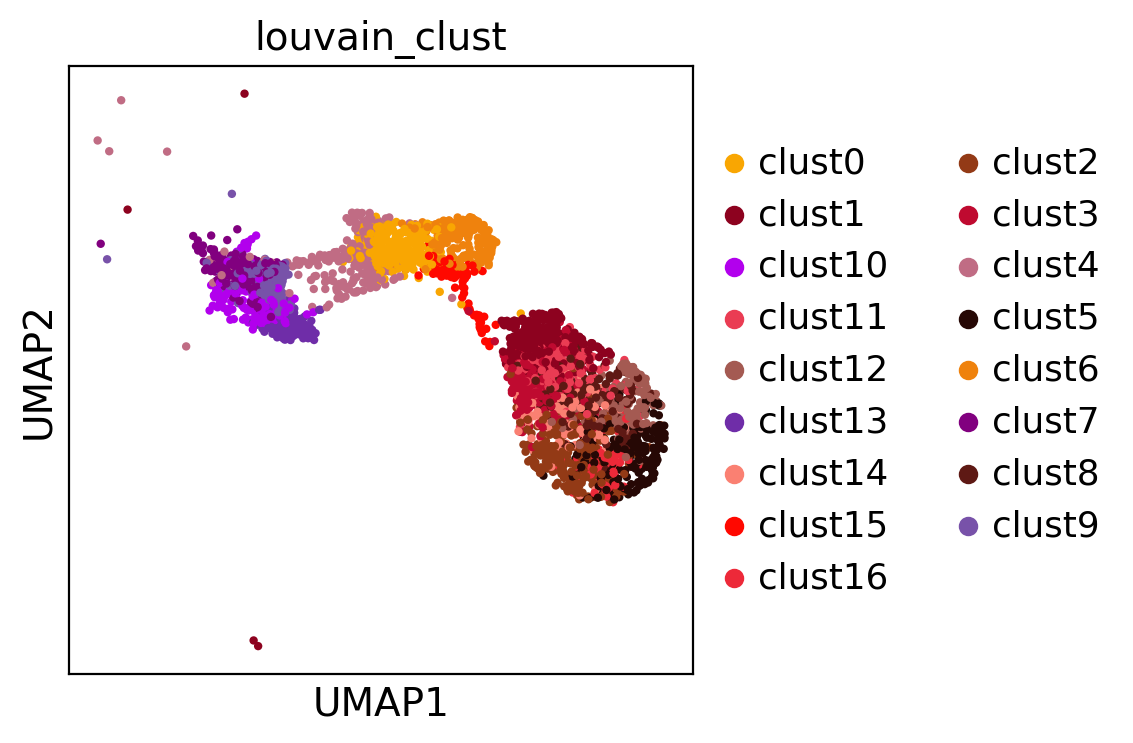

In [321]:
sc.pl.umap(adata, color=[ 'louvain_clust'],palette=colPalette,save="endothelium_ery_al_UMAP.pdf")

# Compute PAGA

In [295]:
sc.pp.neighbors(adata,n_neighbors=15)

sc.tl.paga(adata,groups='louvain_clust')


computing neighbors
    using 'X_pca' with n_pcs = 60
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:03)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)


--> added 'pos', the PAGA positions (adata.uns['paga'])


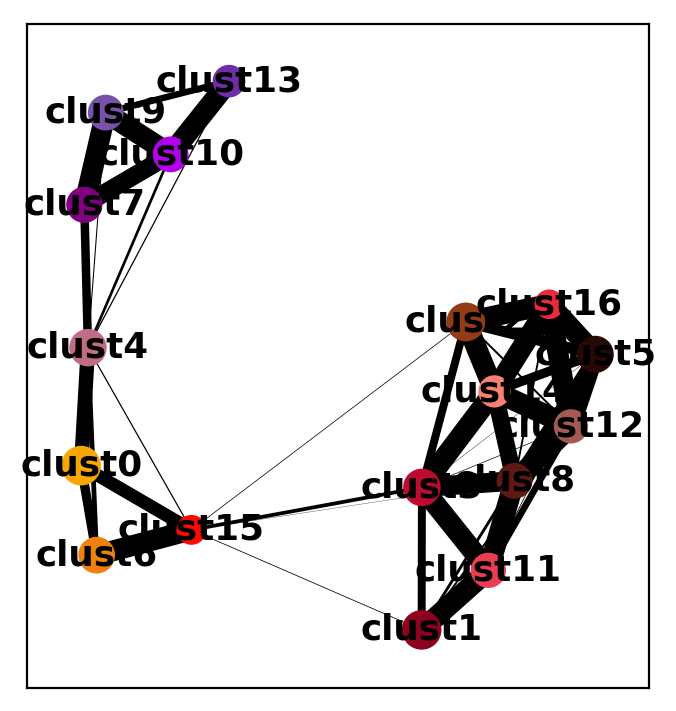

In [311]:
sc.pl.paga(adata, color=['louvain_clust'],random_state=1)
positions = adata.uns['paga']['pos']

In [306]:
positions = np.array(positions)


--> added 'pos', the PAGA positions (adata.uns['paga'])


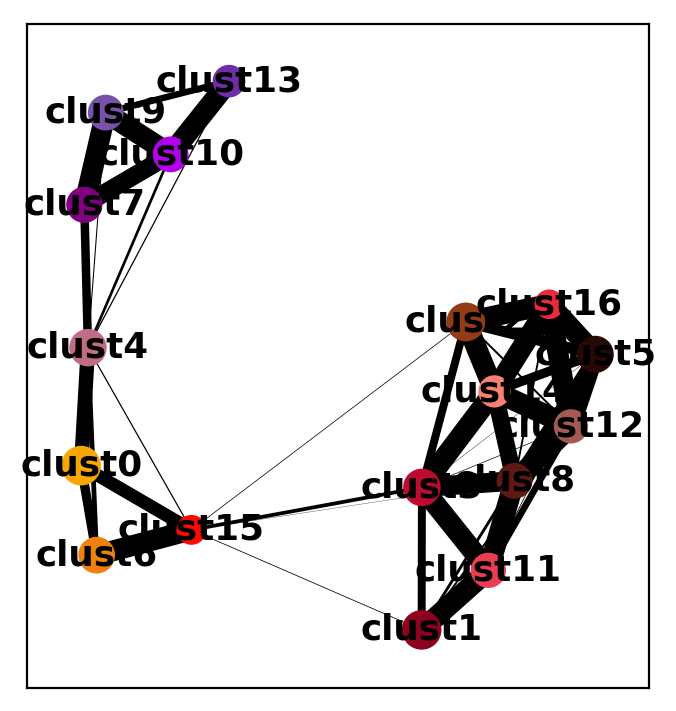

In [307]:
sc.pl.paga(adata, color=['louvain_clust'],pos=positions)


In [308]:
#Rearrange cluster positions
x = [-float(i) for i in list(positions[:,1])]

y = [-float(i) for i in list(positions[:,0])]

positions2 = np.array([x, y]).transpose()
positions2

array([[ -2.90434061,   0.65840076],
       [  2.89904604, -11.86010324],
       [-13.90285506,  -2.6336172 ],
       [  0.79440214, -14.3122114 ],
       [ -4.29297561, -17.35016488],
       [-16.49090425,  -4.77932394],
       [ -5.52805562, -14.53388347],
       [ -0.63441478,  -3.39737311],
       [ -8.60657161, -16.55179646],
       [ -7.98076897, -13.48432022],
       [ -2.13564235, -11.86991988],
       [ -7.07173349,   0.40703776],
       [ -6.83576045, -18.23955888],
       [  0.26006398,   0.08870352],
       [-12.12015646,   0.54135435],
       [ -2.36738325, -15.2732768 ],
       [-15.37793805,  -0.24700603]])

--> added 'pos', the PAGA positions (adata.uns['paga'])


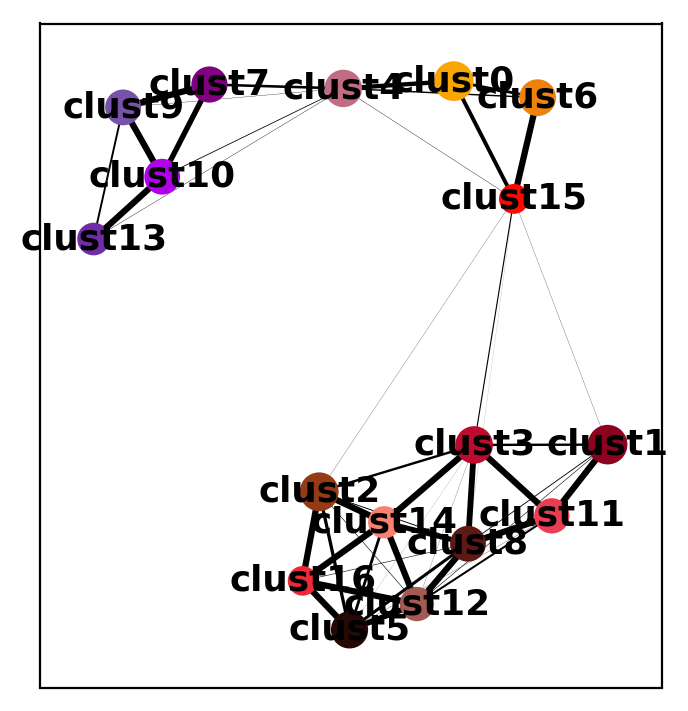

In [380]:
sc.pl.paga(adata, color=['louvain_clust'],edge_width_scale=0.3,pos=positions2,save="endothelium_ery_al_paga.pdf")


# Plot regions on PAGA

--> added 'pos', the PAGA positions (adata.uns['paga'])


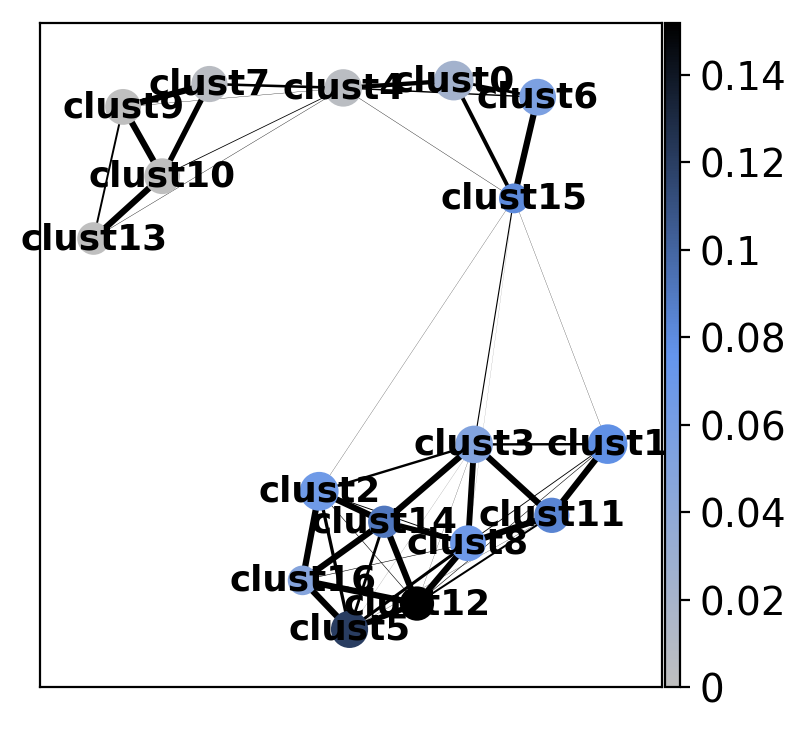

--> added 'pos', the PAGA positions (adata.uns['paga'])


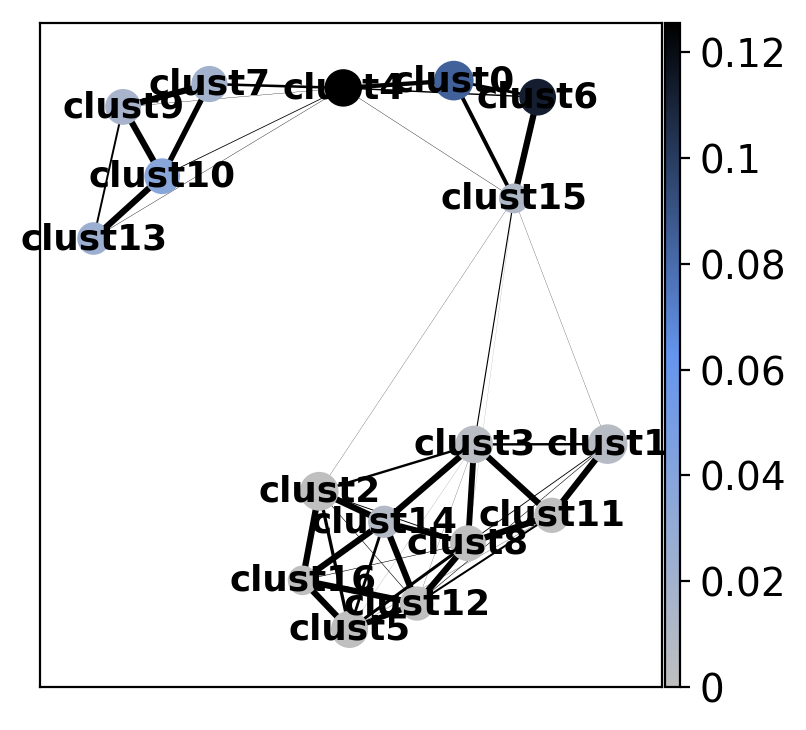

In [381]:
#Runx1 +23kb
sc.pl.paga(adata, color=['chr16_92801464_92801965'],edge_width_scale=0.3,cmap=cmap,pos=positions2,
           save="endothelium_ery_al_PAGA_Runx1plus23kb.pdf")

#Fev +0.7kb
sc.pl.paga(adata, color=['chr1_74884429_74884930'],edge_width_scale=0.3,cmap=cmap,pos=positions2,save="endothelium_ery_al_PAGA_Fevplus07kb.pdf")


# Plot ChIP-seq enrichment scores

In [334]:
chipseq = mmread(direc + '18_endothelium_analysis/data/cisTopic_matrix_50_100_afterReadsInPeaksQC_ery_endo_allantois_ChIPseq_enrichment_cell.mtx')

filename_cells = direc + '18_endothelium_analysis/data/cisTopic_matrix_50_100_afterReadsInPeaksQC_ery_endo_allantois_ChIPseq_enrichment_cell_cellNames.txt'
filename_TF = direc + '18_endothelium_analysis/data/cisTopic_matrix_50_100_afterReadsInPeaksQC_ery_endo_allantois_ChIPseq_enrichment_cell_TF_colnames.txt'

cells_chipseq = np.genfromtxt(filename_cells, dtype='str')

print('reading cells')
TF_names = np.genfromtxt(filename_TF, dtype='str')



reading cells


In [342]:
TF_names

array(['nCounts', 'nAcc', 'ETV2_EB35_pAb', 'ETV2_EB35_pV5', 'heptad',
       'TAL1_Haemangioblast', 'TAL1_HE', 'TAL1_HP'], dtype='<U19')

In [345]:
adata.obs['ETV2_EB35_pV5'] = chipseq.todense()[:,3]
adata.obs['heptad'] = chipseq.todense()[:,4]
adata.obs['TAL1_Haemangioblast'] = chipseq.todense()[:,5]
adata.obs['TAL1_HE'] = chipseq.todense()[:,6]
adata.obs['TAL1_HP'] = chipseq.todense()[:,7]

--> added 'pos', the PAGA positions (adata.uns['paga'])


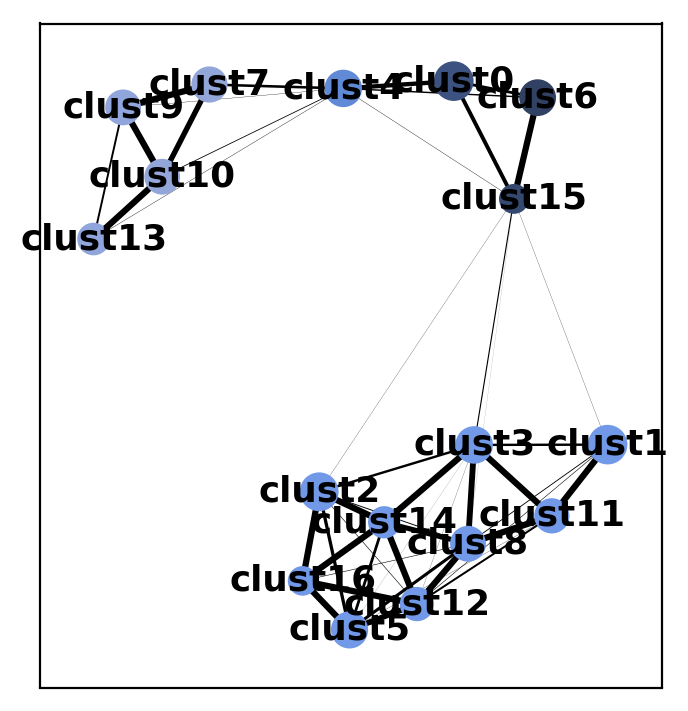

In [391]:
#the colors have been obtained from the last part of [...]endothelium_all_ery_cisTopic_ChIPseq_peaks.R
cmap = LinearSegmentedColormap.from_list(name='gene_cmap',
                                         colors=["#93A6DA","#7299E8","#6F98E9","#5881CC","#314163"])


sc.pl.paga(adata, color=['TAL1_HE'],edge_width_scale=0.3,
           cmap=cmap,pos=positions2,save="endothelium_ery_al_PAGA_TAL1_HE.pdf")
#sc.pl.umap(adata, color=['TAL1_HE'],cmap=cmap,save="endothelium_ery_al_UMAP_TAL1_HE.pdf")


--> added 'pos', the PAGA positions (adata.uns['paga'])


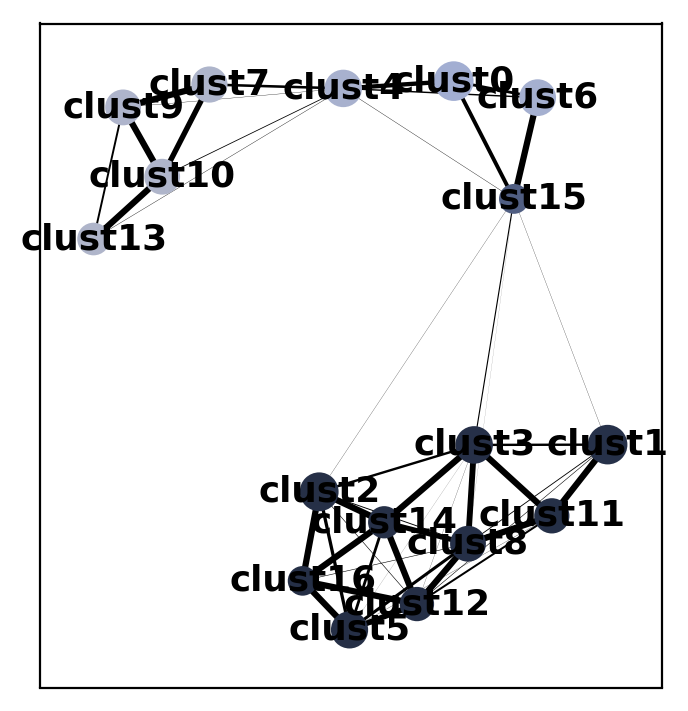

In [390]:
#the colors have been obtained from the last part of [...]endothelium_all_ery_cisTopic_ChIPseq_peaks.R

cmap = LinearSegmentedColormap.from_list(name='gene_cmap',
                                         colors=["#AFB5CA","#9DABD5","#303F60","#2B3753","#252F46"])



sc.pl.paga(adata, color=['TAL1_HP'],edge_width_scale=0.3,cmap=cmap,pos=positions2,save="endothelium_ery_al_PAGA_TAL1_HP.pdf")


--> added 'pos', the PAGA positions (adata.uns['paga'])


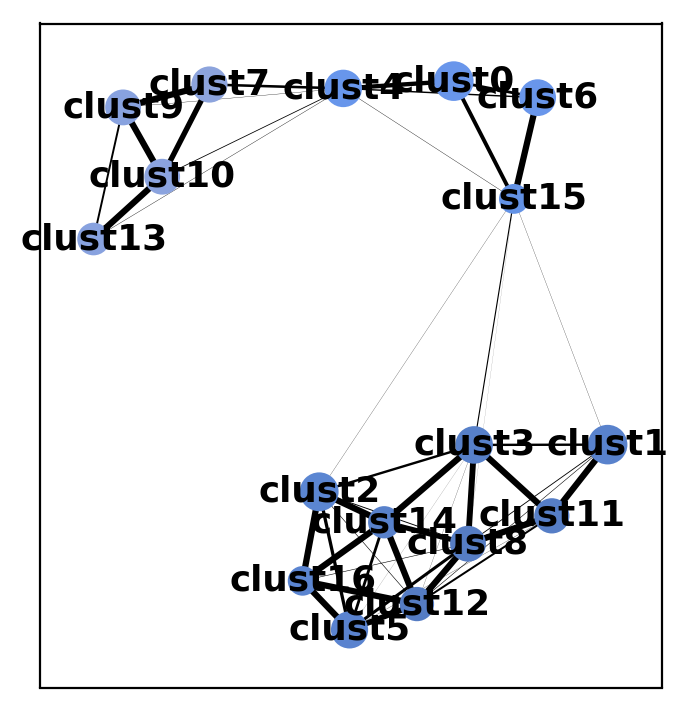

In [392]:
#the colors have been obtained from the last part of [...]endothelium_all_ery_cisTopic_ChIPseq_peaks.R

cmap = LinearSegmentedColormap.from_list(name='gene_cmap',
                                         colors=["#8DA4DD","#7B9CE5","#6996EB","#6696EC","#557CC3"])
sc.pl.paga(adata, color=['TAL1_Haemangioblast'],edge_width_scale=0.3,
          cmap=cmap,
           pos=positions2,save="endothelium_ery_al_PAGA_TAL1_Haemangioblast.pdf"
          )

# Compute Force directed graph and Pseudotime from endothelium to allantois

In [418]:
sc.tl.draw_graph(adata)


drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:34)


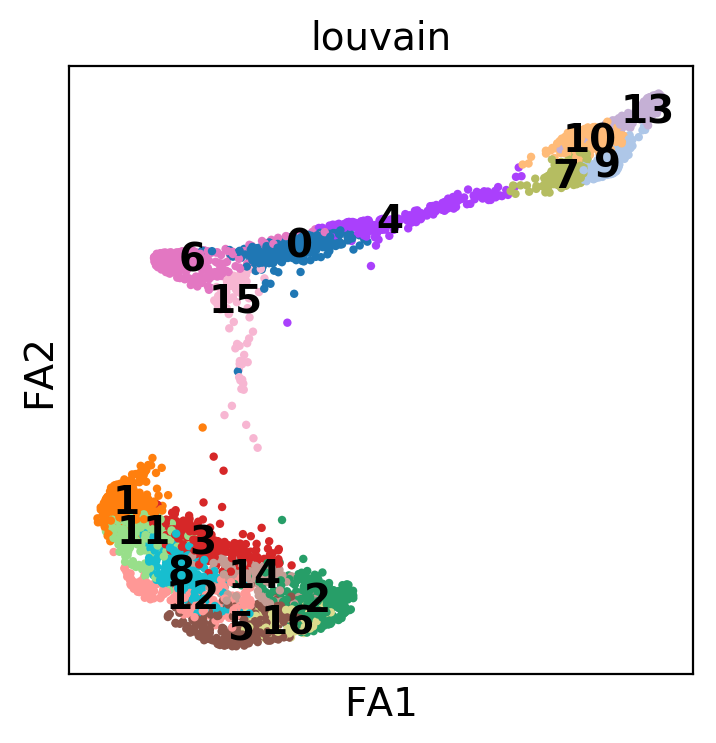

In [419]:
sc.pl.draw_graph(adata, color='louvain', legend_loc='on data')


In [424]:
#Subset clusters
adata_sub = adata[np.array([str(i) in ['0','4','7'] for i in adata.obs['louvain']]),:]


In [435]:
#Define the starting cell
cellStart = np.argmax(adata_sub.obsm['X_draw_graph_fa'][:,0])
cellStart

list(adata_sub.obs['louvain'])[cellStart]

adata_sub.obs_names[cellStart]

adata_sub.uns['iroot'] = cellStart


Trying to set attribute `.uns` of view, making a copy.
Transforming to str index.


In [436]:
# Run dpt
sc.tl.dpt(adata_sub)


computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


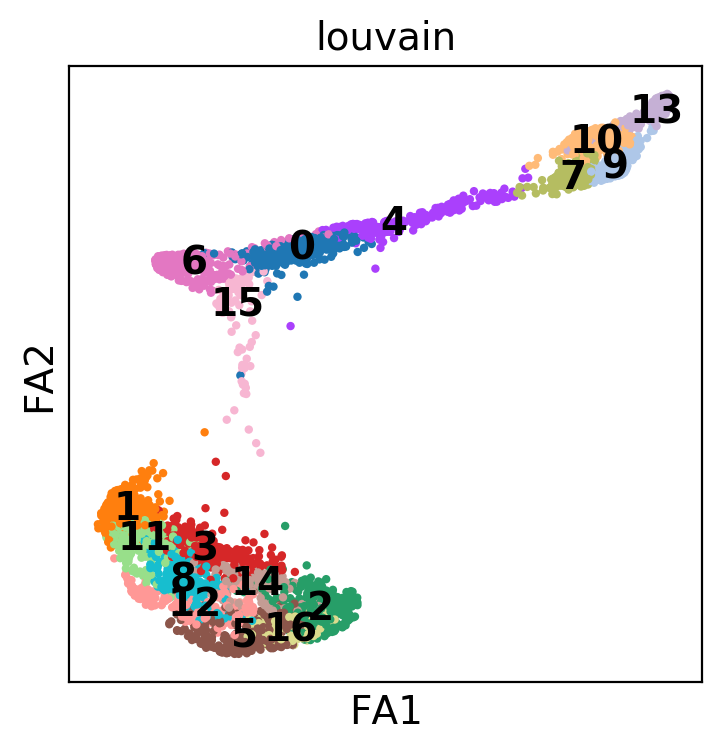

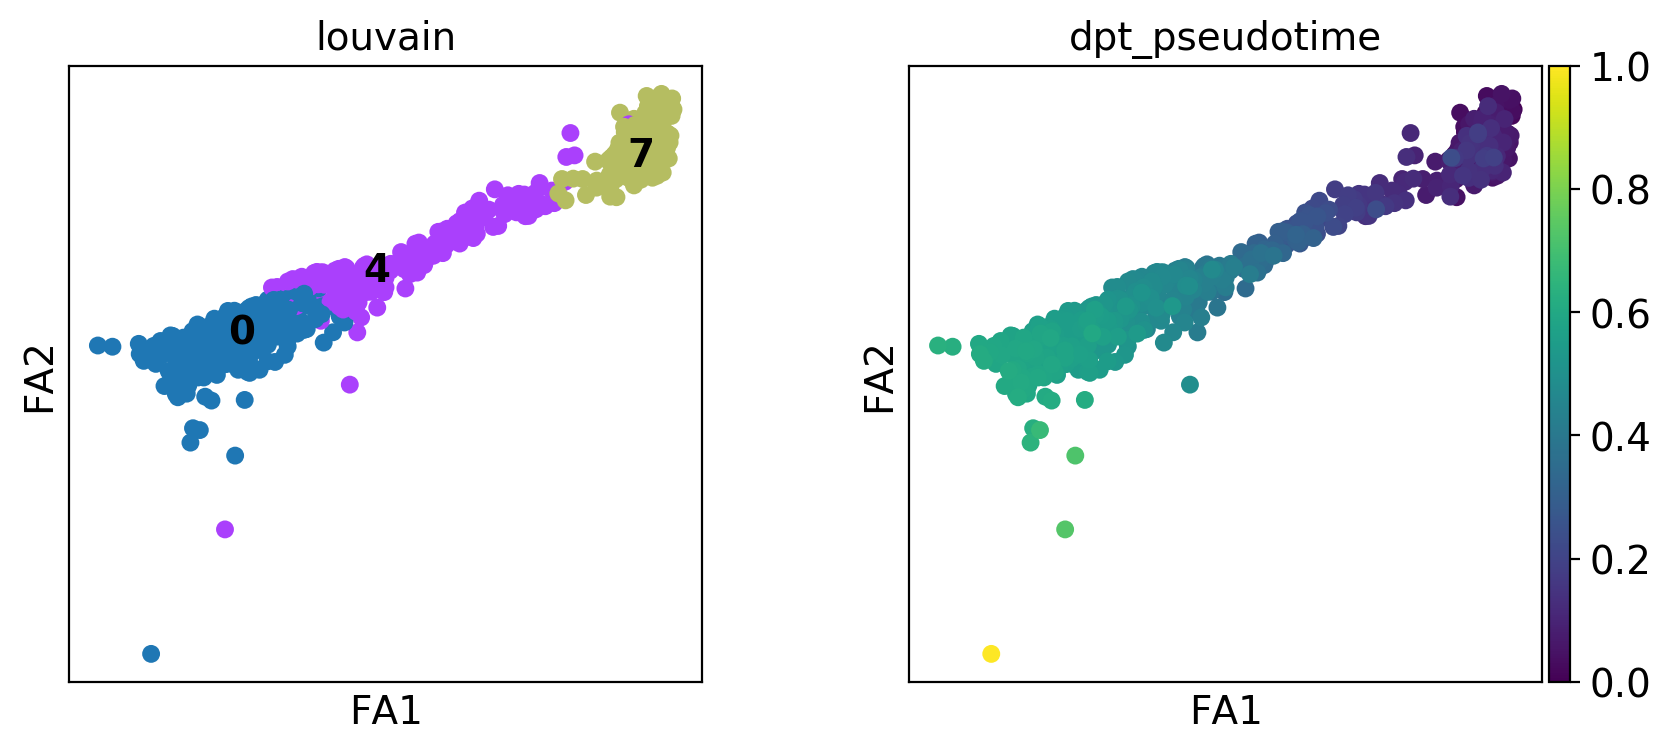

In [438]:
sc.pl.draw_graph(adata_sub, color=['louvain', 'dpt_pseudotime'], legend_loc='on data')


In [447]:
adatasub_names = list()
for i in adata_sub.obs_names:
    adatasub_names.append(cellNames2[int(i)])

In [449]:
#save cell names
cellNames3 = pd.DataFrame(data=adatasub_names)
cellNames3.to_csv(direc + '18_endothelium_analysis/data/snATACseq_embryo_revision1_endothelium_eryAl_cellNames_sub_DPTtraj.csv', sep=',')


In [450]:
#save DPT
dpt = pd.DataFrame(data=adata_sub.obs['dpt_pseudotime'])
dpt.to_csv(direc + '18_endothelium_analysis/data/snATACseq_embryo_revision1_endothelium_eryAl_dpt_sub_DPTtraj.csv', sep=',')


# Write files

In [389]:
#save FA
fa = pd.DataFrame(data=adata.obsm['X_draw_graph_fa'])
fa.to_csv(direc + '18_endothelium_analysis/data/snATACseq_embryo_revision1_endothelium_eryAl_FA.csv', sep=',')

#save clusters
louvain = pd.DataFrame(data=adata.obs['louvain'])
louvain.to_csv(direc + '18_endothelium_analysis/data/snATACseq_embryo_revision1_endothelium_eryAl_louvain.csv', sep=',')
